### 1.matplotlib入门

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


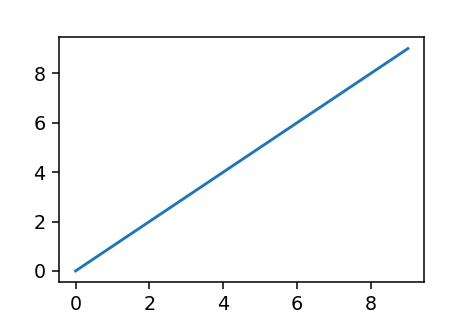

In [7]:
plt.plot(data)

在matplotlib的实例库和文档中学习高级特性

#### Figure和Subplot

matplotlib的图像都位于Figure对象中。使用plt.figure()创建一个新的figure

<IPython.core.display.Javascript object>


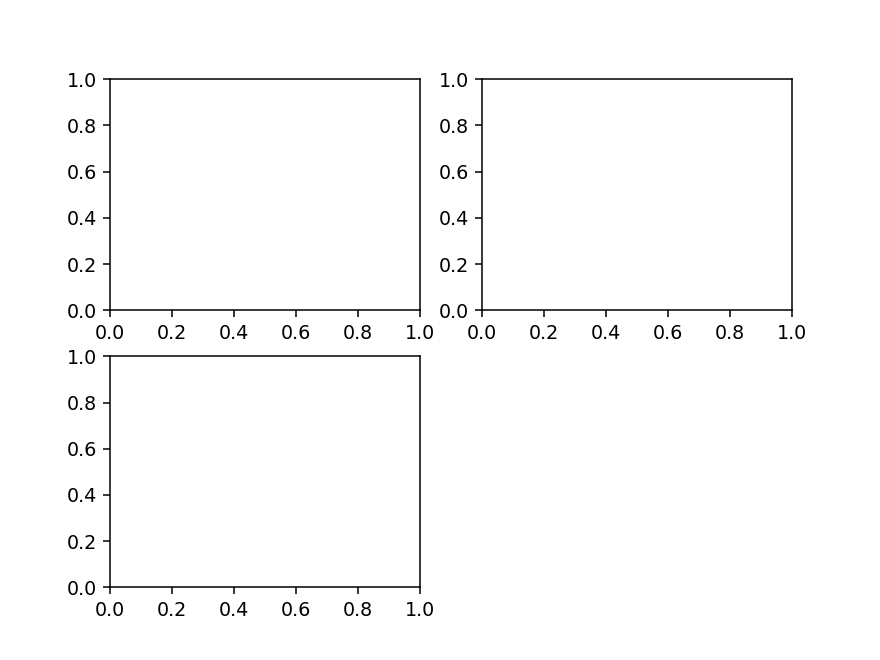

In [42]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

上面创建的图像是2x2的（最多四张图），编号从1开始，

如果这时执行一条绘图命令，matplotlib就会在最后一个用过的Subplot（如果没有则创建一个）上进行绘制，隐藏创建figure和Subplot的过程。

In [23]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

'k--'是一个线型选项，用于告诉matplotlib绘制黑色虚线图。上面那些由fig.add_subplot所返回的对象是AxesSubplot对象，直接调用他们的实例方法就可以在他空着的格子里面画图了

In [24]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

(array([ 2.,  5.,  5.,  5.,  7., 11.,  4., 12.,  7.,  8.,  7.,  5.,  5.,
         7.,  4.,  1.,  0.,  3.,  1.,  1.]),
 array([-1.94524446, -1.71158863, -1.4779328 , -1.24427697, -1.01062114,
        -0.7769653 , -0.54330947, -0.30965364, -0.07599781,  0.15765802,
         0.39131386,  0.62496969,  0.85862552,  1.09228135,  1.32593718,
         1.55959302,  1.79324885,  2.02690468,  2.26056051,  2.49421634,
         2.72787218]),
 <a list of 20 Patch objects>)

In [25]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

创建包含Subplot网格的figure是一个非常常见的任务，matplotlib有一个更为方便的方法plt.subplots，它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的numpy数组

<IPython.core.display.Javascript object>


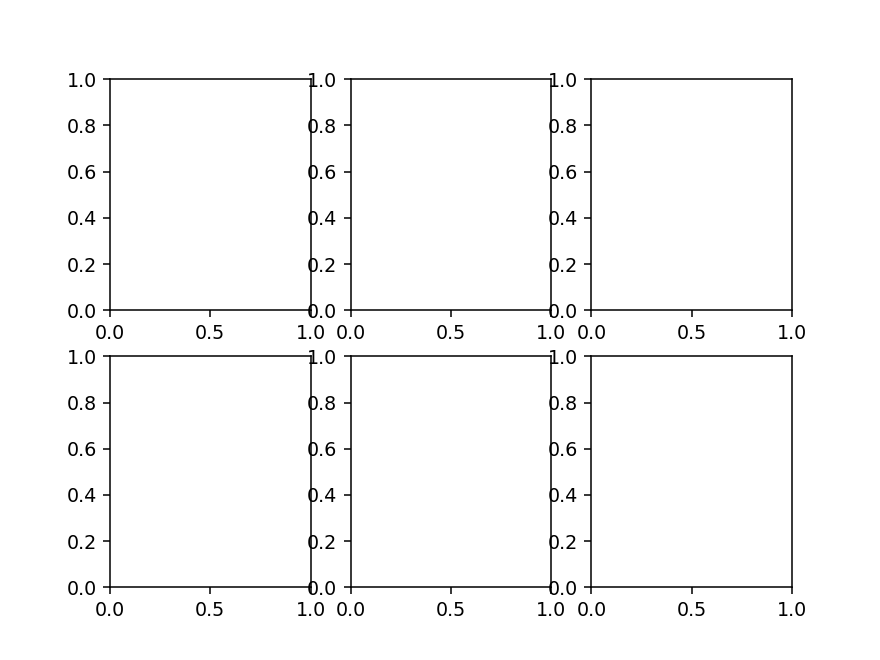

In [26]:
fig, axes = plt.subplots(2, 3)

In [27]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026E68CCACF8>,
      dtype=object)

这是非常实用的，因为可以轻松地对axes数组进行索引，就好像是一个二维数组一样，例如axes[0, 1]。你还可以通过sharex和sharey指定Subplot应该具有相同的X轴或Y轴。在比较相同范围数据时，这也实用，否则matplotlib会自动缩放各图表的界限。

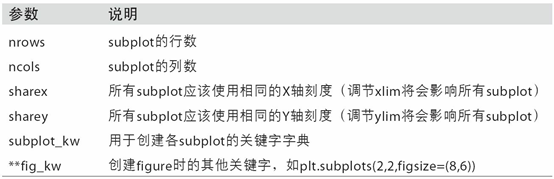

#### 调整subplot周围的间距

默认情况下，matplotlib还会在Subplot外围留下一定的边距，并在Subplot之间留下一定的边距。间距跟图像的高度和宽度有关，调整图像大小，边距自动调整。利用Figure和subplots_adjust方法可以方便的改变间距，它是个顶级函数：

subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

wspace和hspace用于控制宽度和高度的百分比，可以用作Subplot之间的距离。

<IPython.core.display.Javascript object>


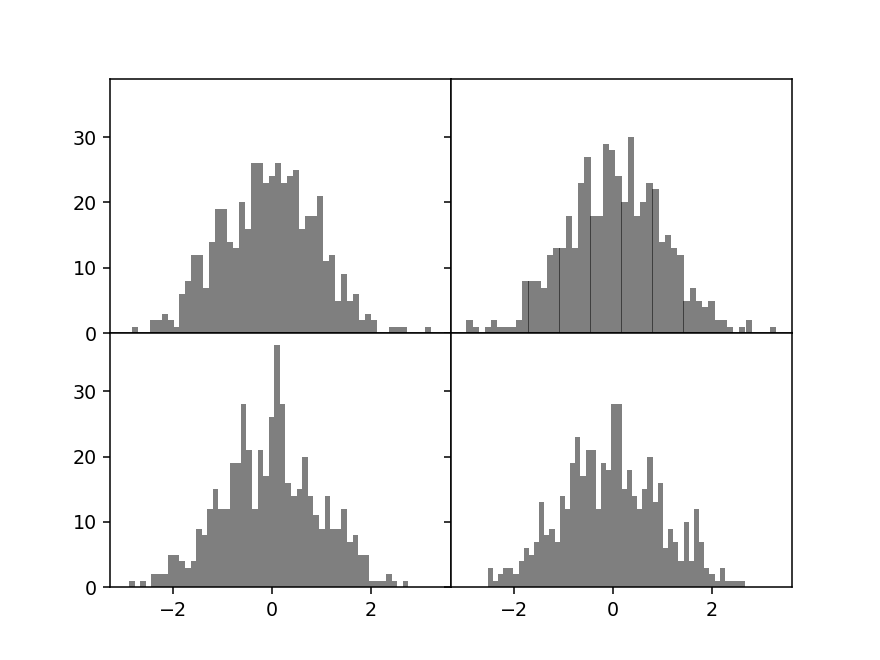

In [39]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)  # 将间距收缩到0

上图，其中的轴标签重叠了。matplotlib不会检查标签是否重叠，只能自己设定刻度位置和刻度标签

#### 颜色、标记和线型

matplotlib的plot函数接受一组x和y坐标，还可以接受一个表示颜色和线型的字符串缩写

In [32]:
ax.plot(x, y, 'g--')  # 根据x，y绘制绿色虚线

In [ ]:
ax.plot(x, y, linestyle='--', color='g')  # 分别指定，效果相同

In [35]:
plt.plot?  # 查看用法

线图可以使用标记强调数据点。matplotlib可以创建连续线图，在点之间进行插值，因此有时可能不太容易看出真实数据点的位置。标记也可以放到格式字符串中，但标记线型和线型必须放在颜色后面

In [50]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')  # 颜色\标记线型\线型

<IPython.core.display.Javascript object>


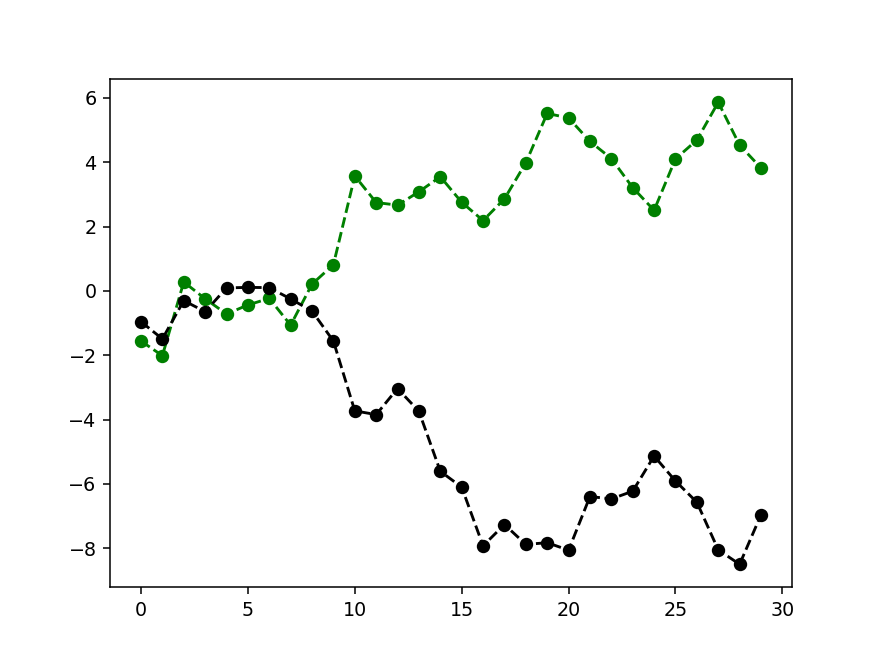

In [49]:
# 更为明确的格式
plt.plot(np.random.randn(30).cumsum(), color='g', linestyle='dashed', marker='o')

在线型图中，非实际数据点默认是按线型方式插值的。可以通过drawstyle选项修改

In [66]:
data = np.random.randn(30).cumsum()

<IPython.core.display.Javascript object>


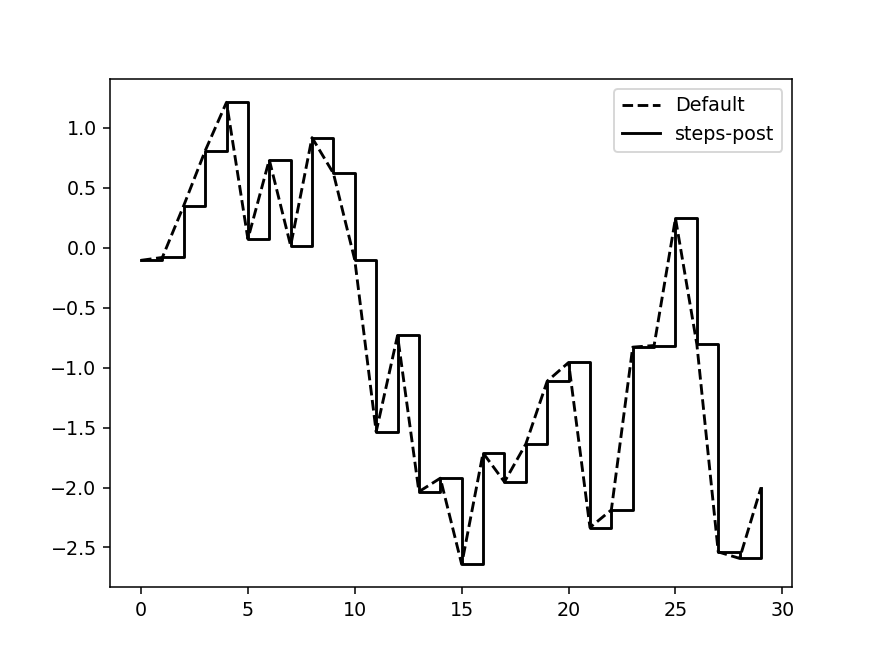

In [75]:
plt.plot(data, 'k--', label='Default')

In [76]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

In [78]:
plt.legend(loc='best')  # 必须使用，无论是否传递了label标签

#### 刻度、标签和图例

对于大多数的图表装饰项，其主要实现方式有二：
 - 使用过程型的pyplot接口，例如matplotlib.pyplot
 - 为面向对象的原生matplotlib API
 
pyplot接口的设计目的就是交互式使用，含有诸如xlim、xticks和xticklabels之类的方法。他们分别控制图表的范围、刻度位置、刻度标签等，使用方式以下两种：
  - 调用时不带参数，则返回当前的参数值（例如plt.xlim()）返回当前x轴绘图范围
  - 调用时带参数，则设置参数（例如plt.xlim([0,10])会将x轴的范围设置到为0到10）

所有这些方法都是对当前或最近创建的AxesSubplot起作用的。他们各自对应Subplot对象上的两个方法，以xlim为例，就是ax.get_xlim和ax.set_xlim。

#### 设置标题、轴标签、刻度和刻度标签

为了说明自定义轴，创建一个简单的图像并绘制一段随机漫步

<IPython.core.display.Javascript object>


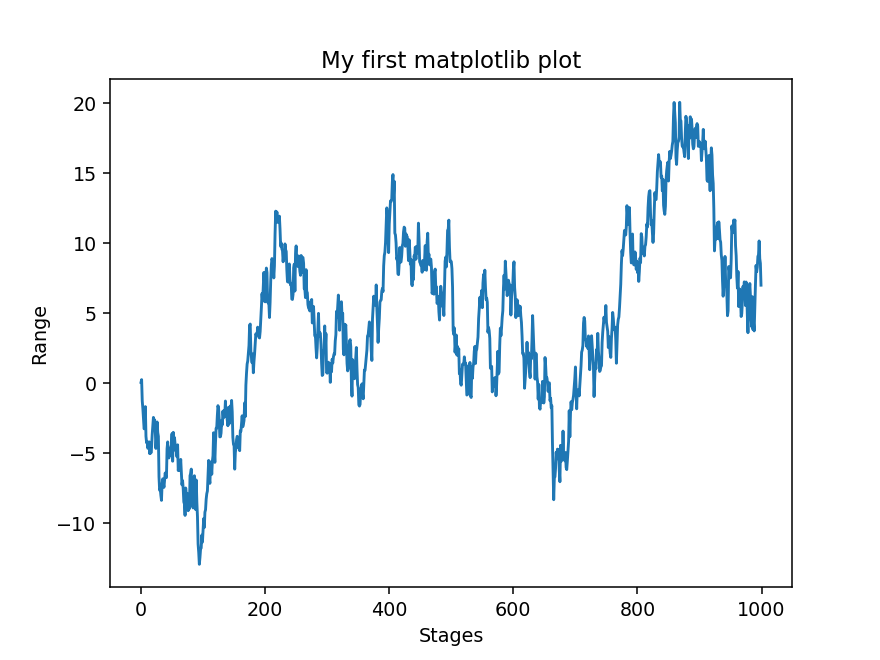

In [83]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

要改变x轴刻度，最简单的办法是使用set_xticks和set_xticklabels。前者告诉matplotlib要将刻度放在数据范围中的哪些位置，默认这些位置就是刻度标签，通过set_xticklabels将任何其他的值用作标签:

In [80]:
ticks = ax.set_xticks([0, 250, 750, 1000])

In [81]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')

rotation选项设定x刻度标签倾斜30度。最后，再用set_xlabel为x轴设置一个名称，并用set_title设置一个标题：

In [86]:
ax.set_title("My First matplotlib plot")  # 绘图标题

Text(0.5,1,'My First matplotlib plot')

In [87]:
ax.set_xlabel('Stages')  # x轴名称

Text(0.5,32.5931,'Stages')

In [88]:
ax.set_ylabel('Range')  

Text(48.7431,0.5,'Range')

轴的类有集合方法，可以批量设定绘图选项。如：

In [90]:
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages',
    'ylabel': 'Range'
}
ax.set(**props)

[Text(48.7431,0.5,'Range'),
 Text(0.5,32.5931,'Stages'),
 Text(0.5,1,'My first matplotlib plot')]

#### 添加图例（legend）

图例（legend）是另一种标识图表元素的重要工具。最简单的添加图例是在添加Subplot的时候传入label参数：

<IPython.core.display.Javascript object>


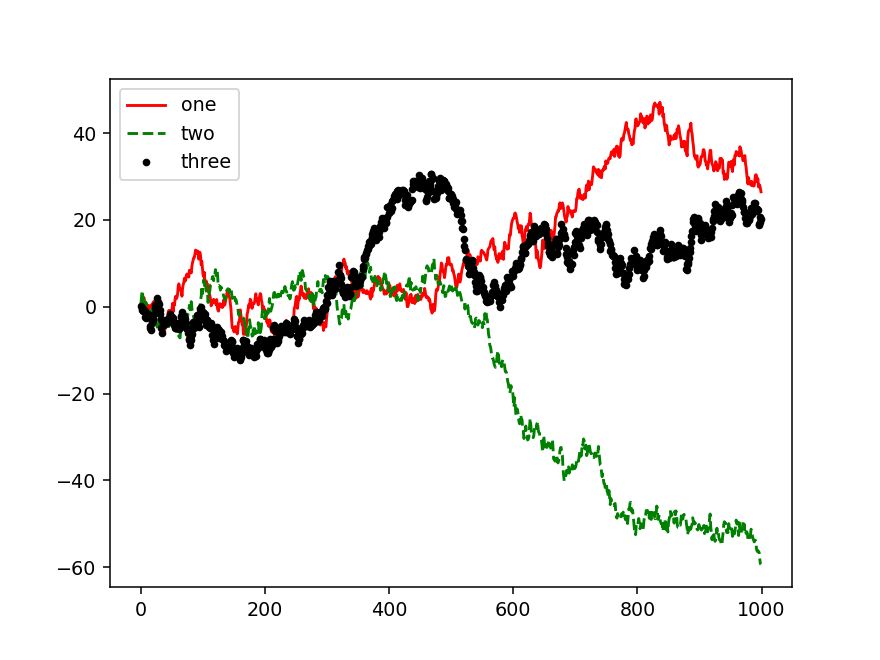

In [93]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'r', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'g--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')  # 创建图例

In [96]:
ax.legend?  # 文档

#### 注释以及在Subplot上绘图

除标准的绘图类型，还希望绘制一些子集的注释，可能是文本、箭头或其他图形。注释和文字可以通过text、arrow和annotate函数进行添加。text可以将文本绘制在图表的指定坐标（x，y），还可以加上自定义格式：

In [98]:
ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)

注释中可以既含有文本又含有箭头。我们根据最近的标准普尔500指数价格绘制一张曲线图并标出2008到2009年金融危机期间的一些重要的日期。

<IPython.core.display.Javascript object>


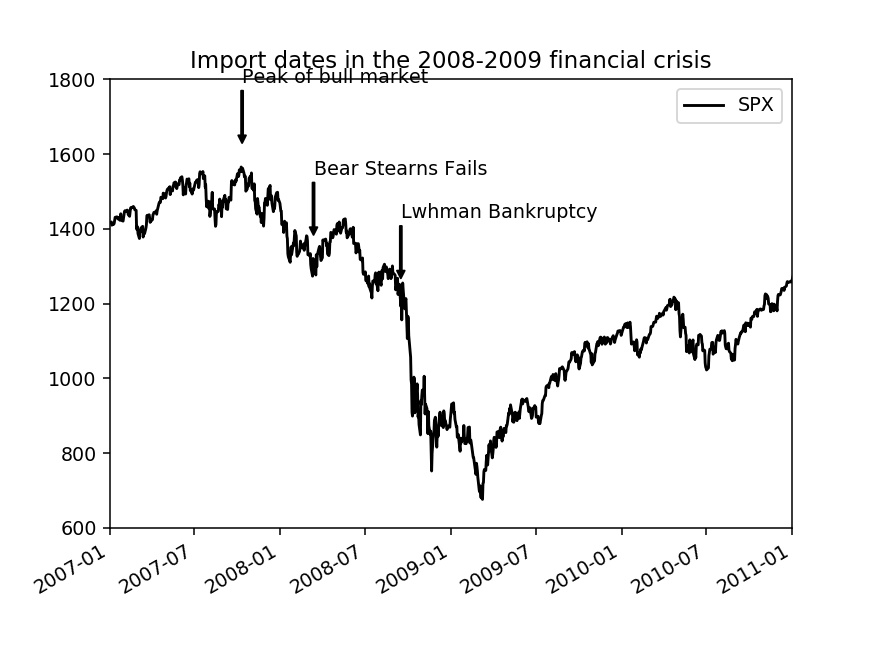

Text(0.5,1,'Import dates in the 2008-2009 financial crisis')

In [111]:
from datetime import datetime
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('E:\jupyter notebook\pydata-book-2nd-edition\examples\spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')
plt.legend(loc='best')

# 危机时期
crisis_data =  [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lwhman Bankruptcy')
]

# 给图表增加注释annotate
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwidth=4, width=1, headlength=4),  # 箭头形状
               horizontalalignment='left', verticalalignment='stop')

# 设置x轴、y轴范围
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

# 设置图表标题
ax.set_title('Import dates in the 2008-2009 financial crisis')
    

ax.annotate方法可以在指定的x和y坐标轴绘制标签。

图形的绘制比较麻烦。matplotlib有一些表示常见图形的对象（块（patch））。其中有些（如Rectangle和Circle）可以在matplotlib.pyplot中找到，完整的集合位于matplotlib.patches。

要在图表中添加一个图形，你需要创建一个块对象shp，然后通过ax.add_patch(shp)将其添加到subplot中：

<IPython.core.display.Javascript object>


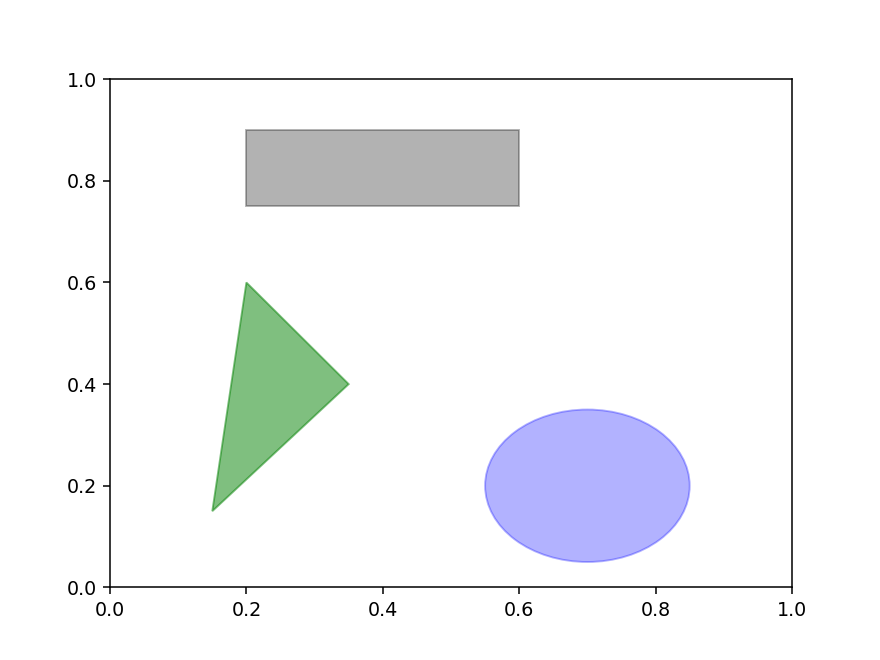

In [112]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

#### 将图表保存到文件

将图表保存为SVG文件

In [ ]:
plt.savefig('figpath.svg')  # 相当于Figure对象的实例方法

文件类型是通过文件扩展名推断出来的。比较常用的选项dpi（控制“每英寸点数”分辨率）和bbox_inches（可以剪出当前图表周围的空白部分）

In [ ]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
# 得到一张带有最小白边且分辨率为400DPI的PNG图片

savefig并非一定要写入磁盘，也可以写入任何文件型的对象，比如BytesIO

In [ ]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

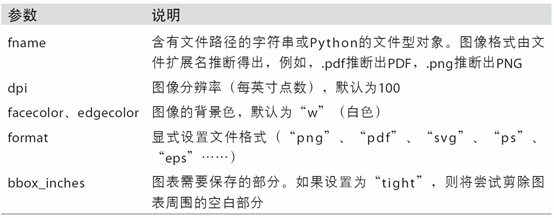

#### matplotlib配置

matplotlib自带一些配色方案，以及为生成出版质量的图片而设定的默认配置信息。几乎所有的默认行为都能通过一组全局参数进行自定义，他们可以管理图像大小、subplot边距、配色方案、字体大小、网格类型等。

一种Python编程方式配置系统的方法是使用rc方法：

In [ ]:
plt.rc('figure', figsize=(10 10))  # 将全局的图像默认大小设置为10 x 10
# rc的第一个参数使希望自定义的对象，如'figure'、'axes'、'xticks'、'grid'、'legend'等’
# 其后可以跟上一系列参数，可以将这些选项写成一个字典

In [ ]:
font_options = {'family': 'monospace',
               'weight': 'bold',
               'size': 'small'}
plt.rc('font', **font_options)

### 2.使用pandas和seaborn绘图

#### 线型图

Series和DataFrame都有一个用于生成各类图表的 plot方法。默认生成线型图

<IPython.core.display.Javascript object>


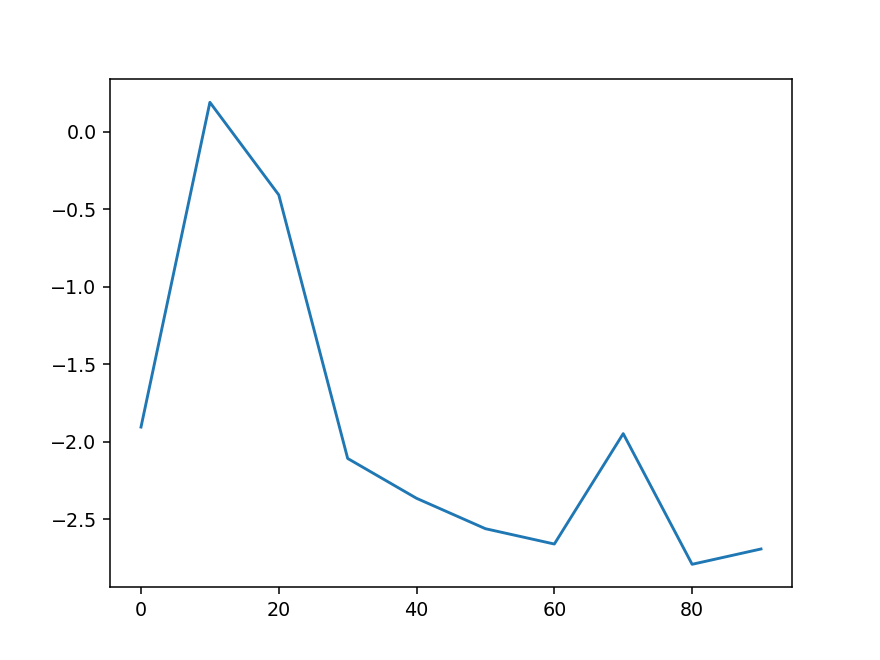

In [113]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

该Series对象的索引会被传给matplotlib，并用以绘制x轴。可以通过use_index=False禁用。x轴的刻度和界限可以通过xticks和xlim选项进行调节，y轴就用yticks和ylim。

plot参数列表：

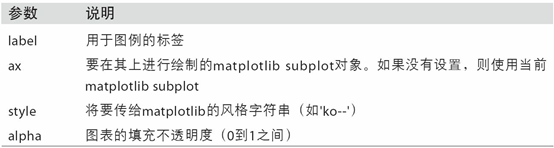

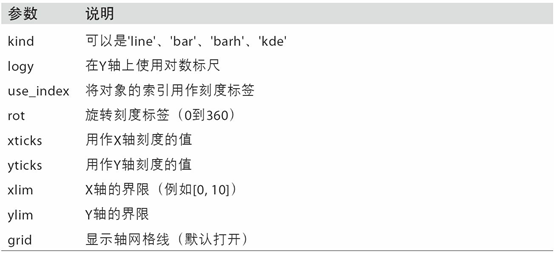

DataFrame的plot方法会在一个subplot中为各列绘制一条线，并自动创建图例：

<IPython.core.display.Javascript object>


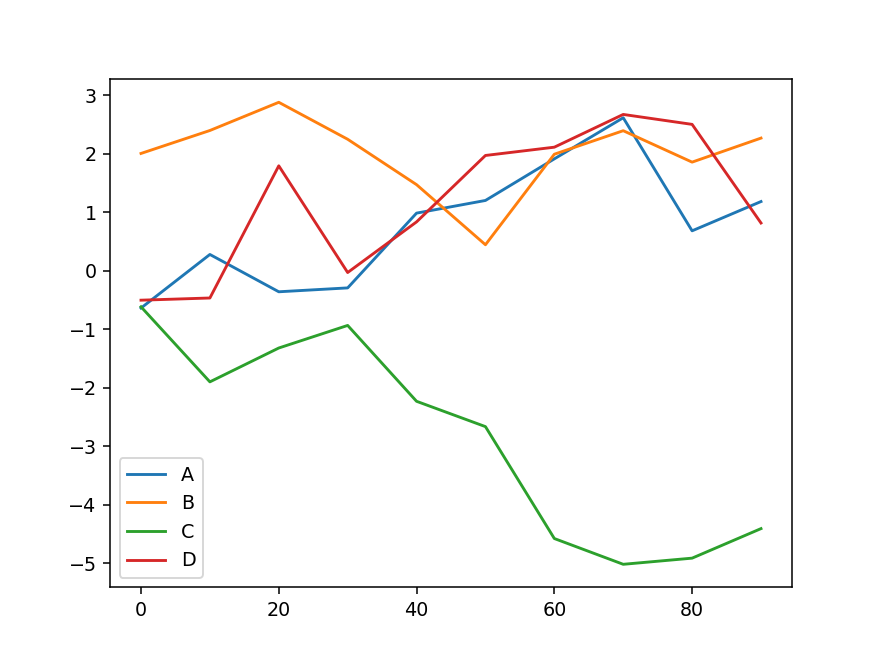

,A,B,C,D
0,-0.635698,2.007422,-0.614111,-0.501137
10,0.280441,2.399775,-1.897366,-0.463676
20,-0.357374,2.881817,-1.318677,1.795902
30,-0.291062,2.250017,-0.932737,-0.028186
40,0.987200,1.473875,-2.229619,0.837466
50,1.203726,0.446724,-2.662654,1.972801
60,1.914810,1.994271,-4.575768,2.114536
70,2.617644,2.396236,-5.016297,2.674290
80,0.684762,1.858994,-4.911146,2.504313
90,1.185263,2.269862,-4.406345,0.818236


In [116]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=list('ABCD'), index=np.arange(0, 100, 10))
df.plot()
df

DataFrame还有一些用于对列进行灵活处理的选项，例如是要将所有列都绘制到一个subplot中还是各自创建各自的subplot

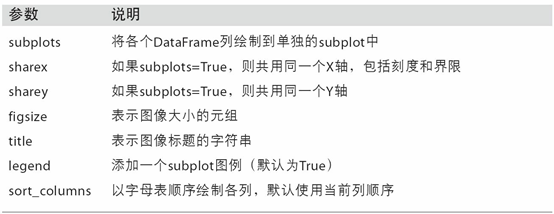

#### 柱状图

plot.bar()和plot.barh()分别绘制水平和垂直的柱状图。这时，Series和DataFrame的索引将会被用作x（bar）或y（barh）刻度：

<IPython.core.display.Javascript object>


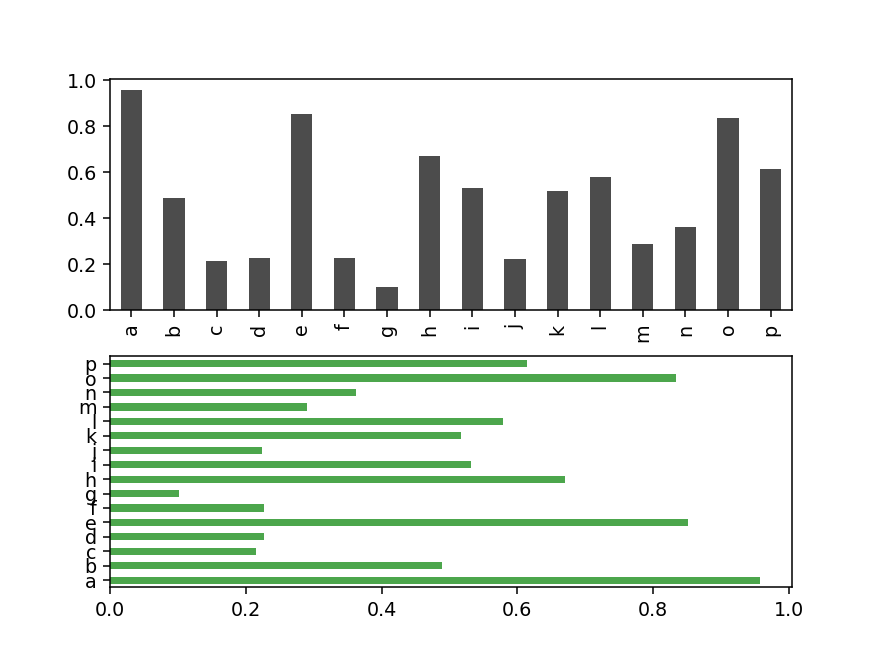

In [147]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='g', alpha=0.7)

对于DataFrame，柱状图会将每一行的值分为一组，并排显示：

In [145]:
df = pd.DataFrame(np.random.rand(6, 4), index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(list('ABCD'), name='Genus'))
df

Genus,A,B,C,D
one,0.437435,0.072139,0.662320,0.008495
two,0.011207,0.655612,0.500671,0.024598
three,0.031953,0.687137,0.764141,0.480413
four,0.772937,0.446455,0.111785,0.114005
five,0.923700,0.935792,0.243476,0.363195
six,0.925220,0.735129,0.520711,0.833514


<IPython.core.display.Javascript object>


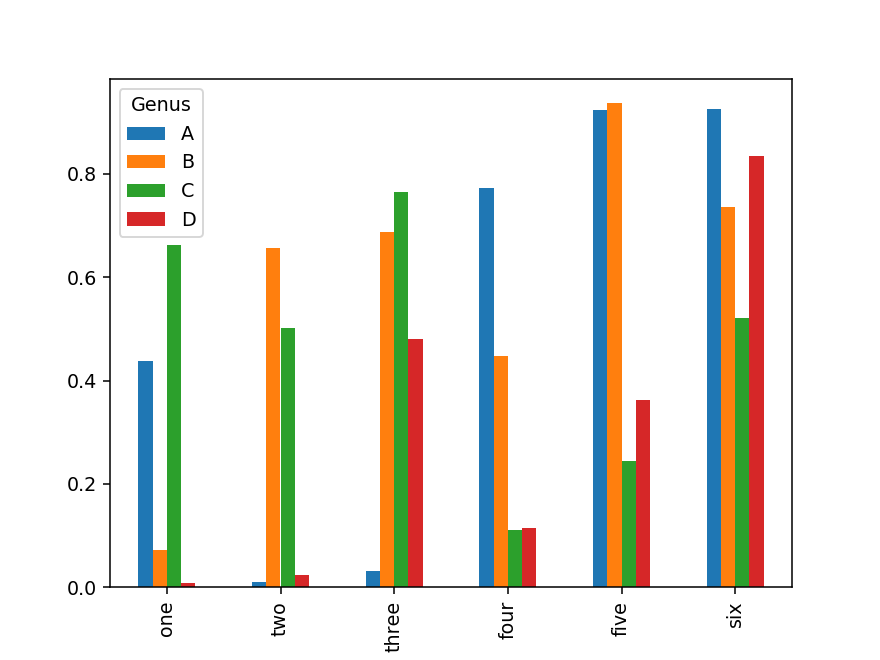

In [146]:
df.plot.bar()

注意：DataFrame的各列的名称“Genus”被用作了图例的标题

设置stacked=True即可为DataFrame生成堆积柱状图，每行的值堆积到一起


<IPython.core.display.Javascript object>


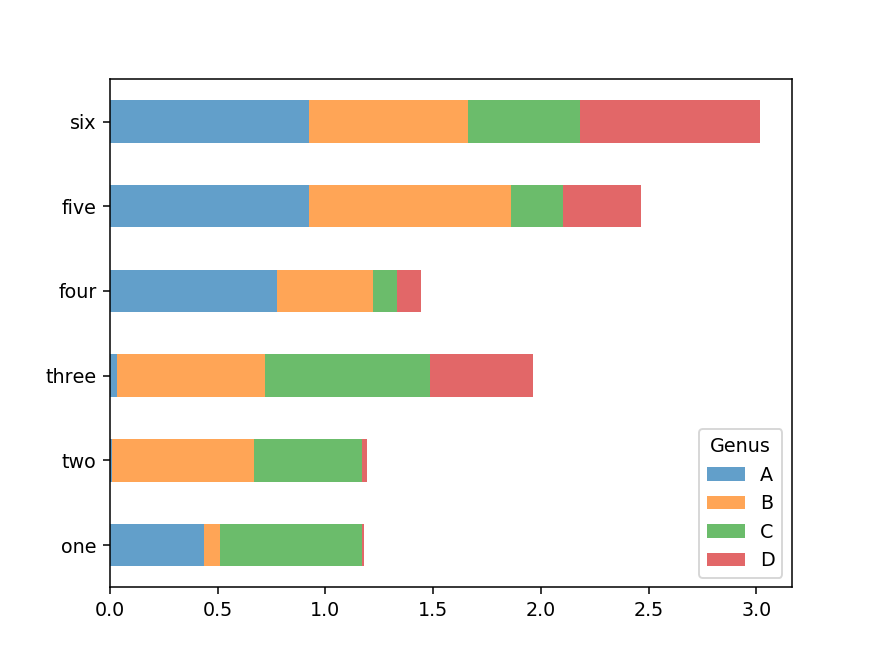

In [148]:
df.plot.barh(stacked=True, alpha=0.7)

柱状图可以利用value_counts图形化显示Series中各值得出现频率，比如s.value_counts().plot.bar()

再以本书前面用过的那个有关小费的数据集为例，假设我们想要做一张堆积柱状图以展示每天各种聚会规模的数据点的百分比。根据日期和聚会规模创建一张交叉表：

In [21]:
tips = pd.read_csv("tips.csv")

In [22]:
party_counts = pd.crosstab(tips['day'], tips['size'])  # 创建交叉表
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [23]:
# 单人和六人派对不是很多，只要2-5列数据
party_counts = party_counts.loc[:, 2:5]

In [24]:
# 将数据标准化,使每行和为1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


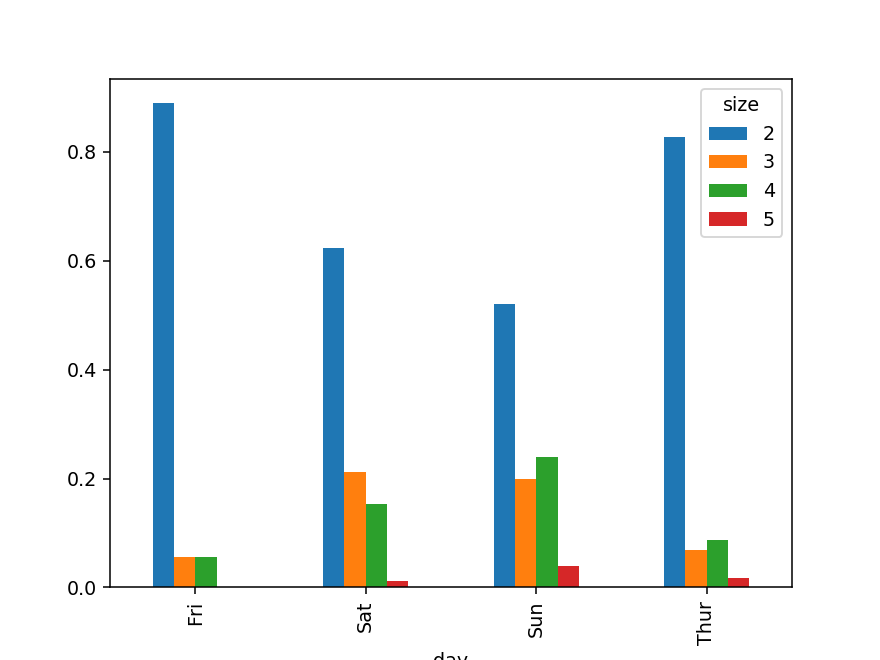

In [25]:
party_pcts.plot.bar()

对于在绘制一个图形前，需要进行合计的数据，使用seaborn可以减少工作量。

In [26]:
import seaborn as sns

In [27]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])  # 计算消费比例
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<IPython.core.display.Javascript object>


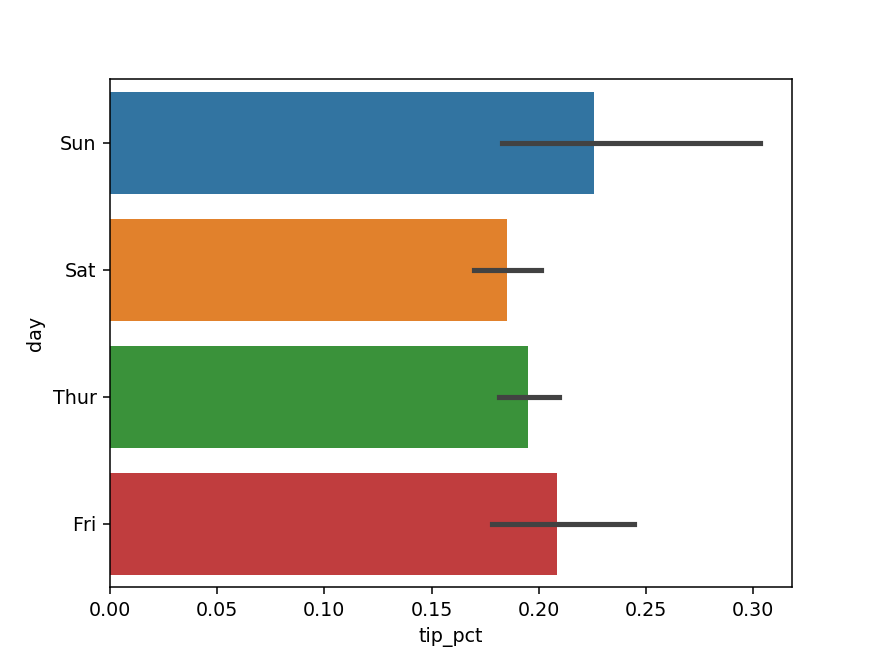

In [32]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')  # h表示水平绘制，v垂直

柱状图上的黑线代表95%的置信区间（可以通过参数配置）

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<IPython.core.display.Javascript object>


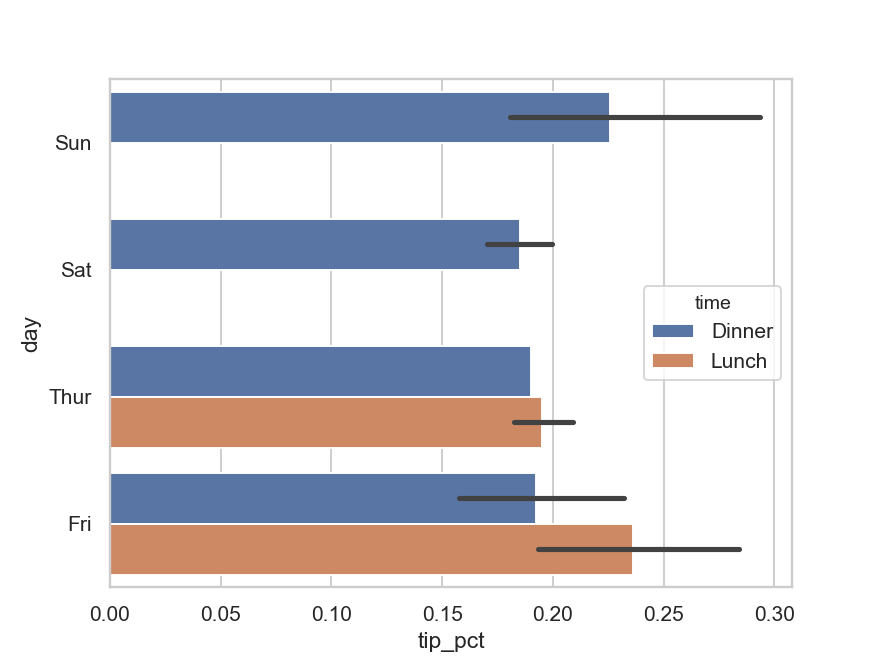

In [43]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

seaborn自动修改了图形的美观度：默认调色板，图形背景和网格线的颜色。使用seaborn.set在不同的图形外观之间切换

In [39]:
sns.set(style="whitegrid")

#### 直方图和密度图

直方图（histogram）是一种可以直接对值频率进行离散化显示的柱状图。数据点被拆分到离散的、间隔均匀的面元中，绘制的是各面元中数据点的数量。通过在Series使用plot.hist方法，生成一张“小费占消费总额百分比”的直方图：

In [41]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


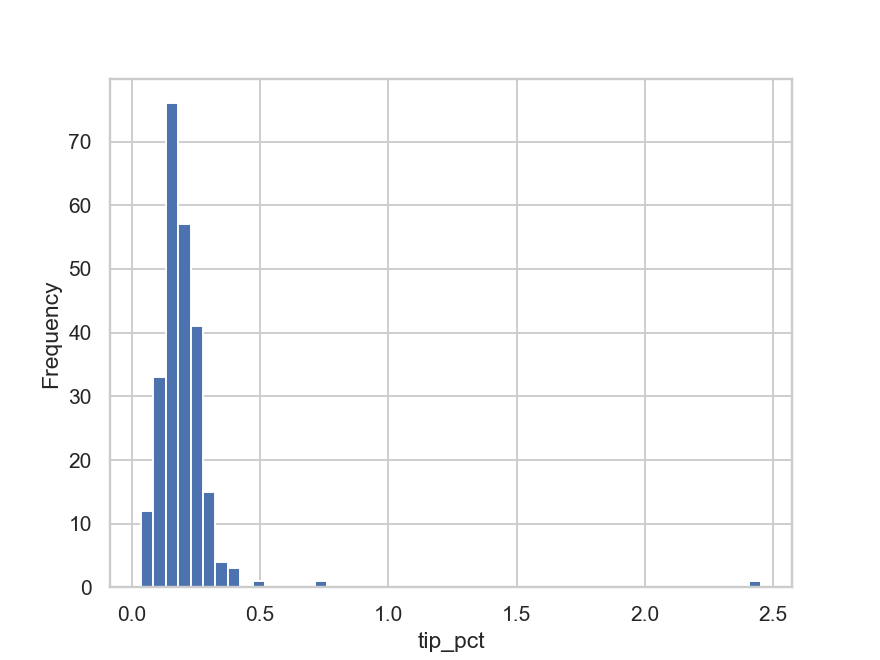

Text(0.5,0,'tip_pct')

In [62]:
tips['tip_pct'].plot.hist(bins=50)  # hist频数计算直方图
plt.xlabel('tip_pct')

与此相关的另一种图表类型是密度图，它是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的。一般的过程是将该分布近似为一组核（即诸如正太分布之类的较为简单的分布）。因此，密度图也被称为KDE（kernel Dendity Estimate，核密度估计）图。

<IPython.core.display.Javascript object>


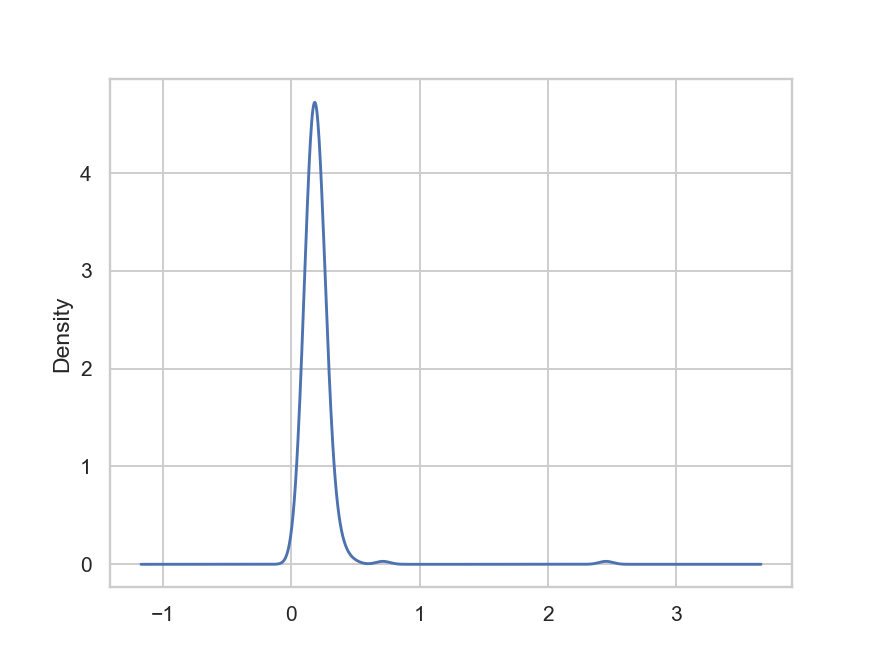

In [64]:
# 使用plot.kde和标准正太分布估计即可产生一张密度（density）图
tips['tip_pct'].plot.density()

seaborn的distplot方法绘制直方图和密度图更加简单，还可以同时画出直方图和连续密度估计图。

<IPython.core.display.Javascript object>


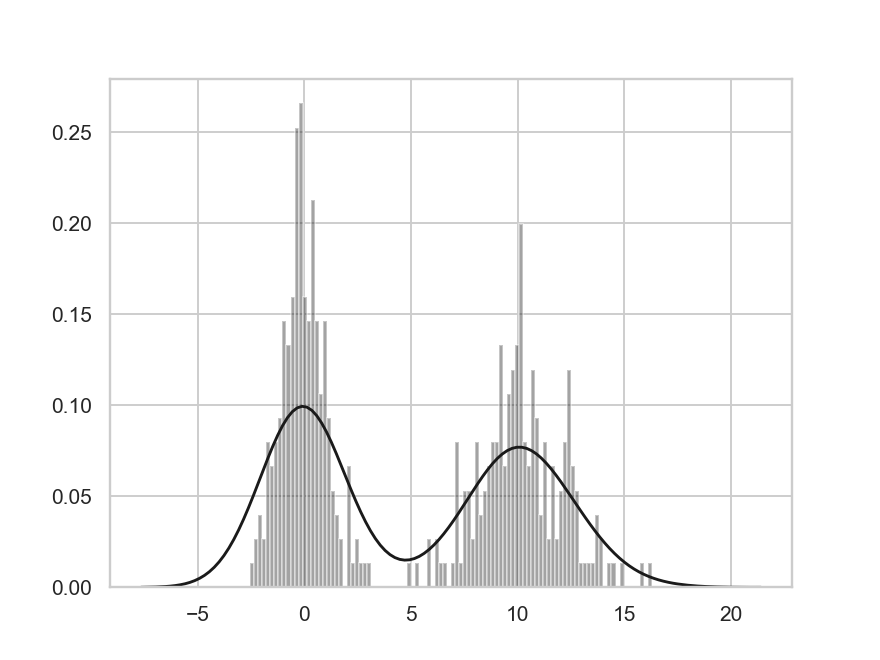

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [83]:
# 考虑一个双峰分布，由两个不同的标准正太分布组成
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

#### 散布图或点图

点图或散布图是观察两个一维数据序列之间的关系的有效手段。

In [72]:
macro = pd.read_csv('E:\jupyter notebook\pydata-book-2nd-edition\examples\macrodata.csv')

In [73]:
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [74]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [80]:
trans_data = np.log(data).diff().dropna()  
# 计算data中变量的对数差,diff是某行减去上一行得到的差值，第一行为NaN

In [81]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


然后使用seaborn的regplot方法，做一个散布图，并加上一条线性回归的线

<IPython.core.display.Javascript object>


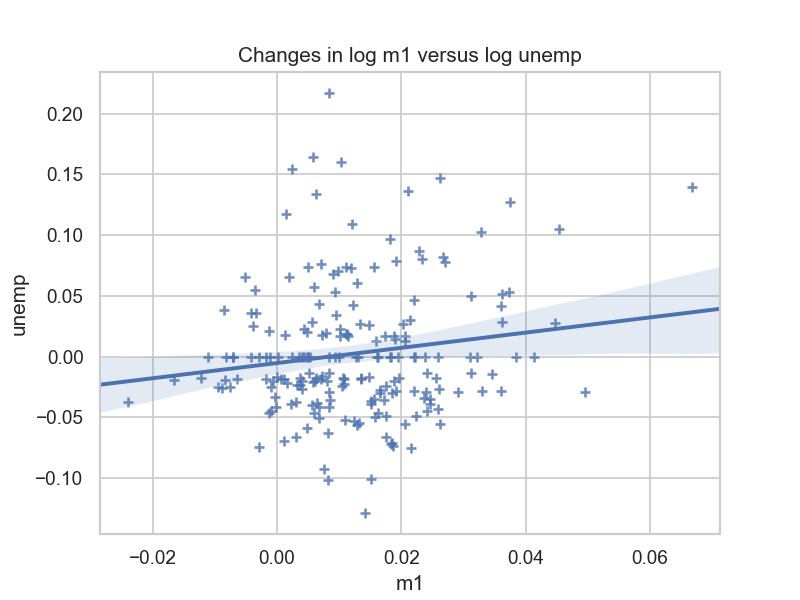

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Changes in log m1 versus log unemp')

In [88]:
sns.regplot('m1', 'unemp', data=trans_data, marker='+')  # 线型拟合曲线
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

在探索是数据分析中，同时观察一组变量的散布图是有意义的，这也被成为散步矩阵（scatter plot matrix）。纯手工创建这样的图表费功夫，seaborn提供了便捷的pairplot函数，支持在对角线上放置每个变量的直方图或密度估计：

<IPython.core.display.Javascript object>


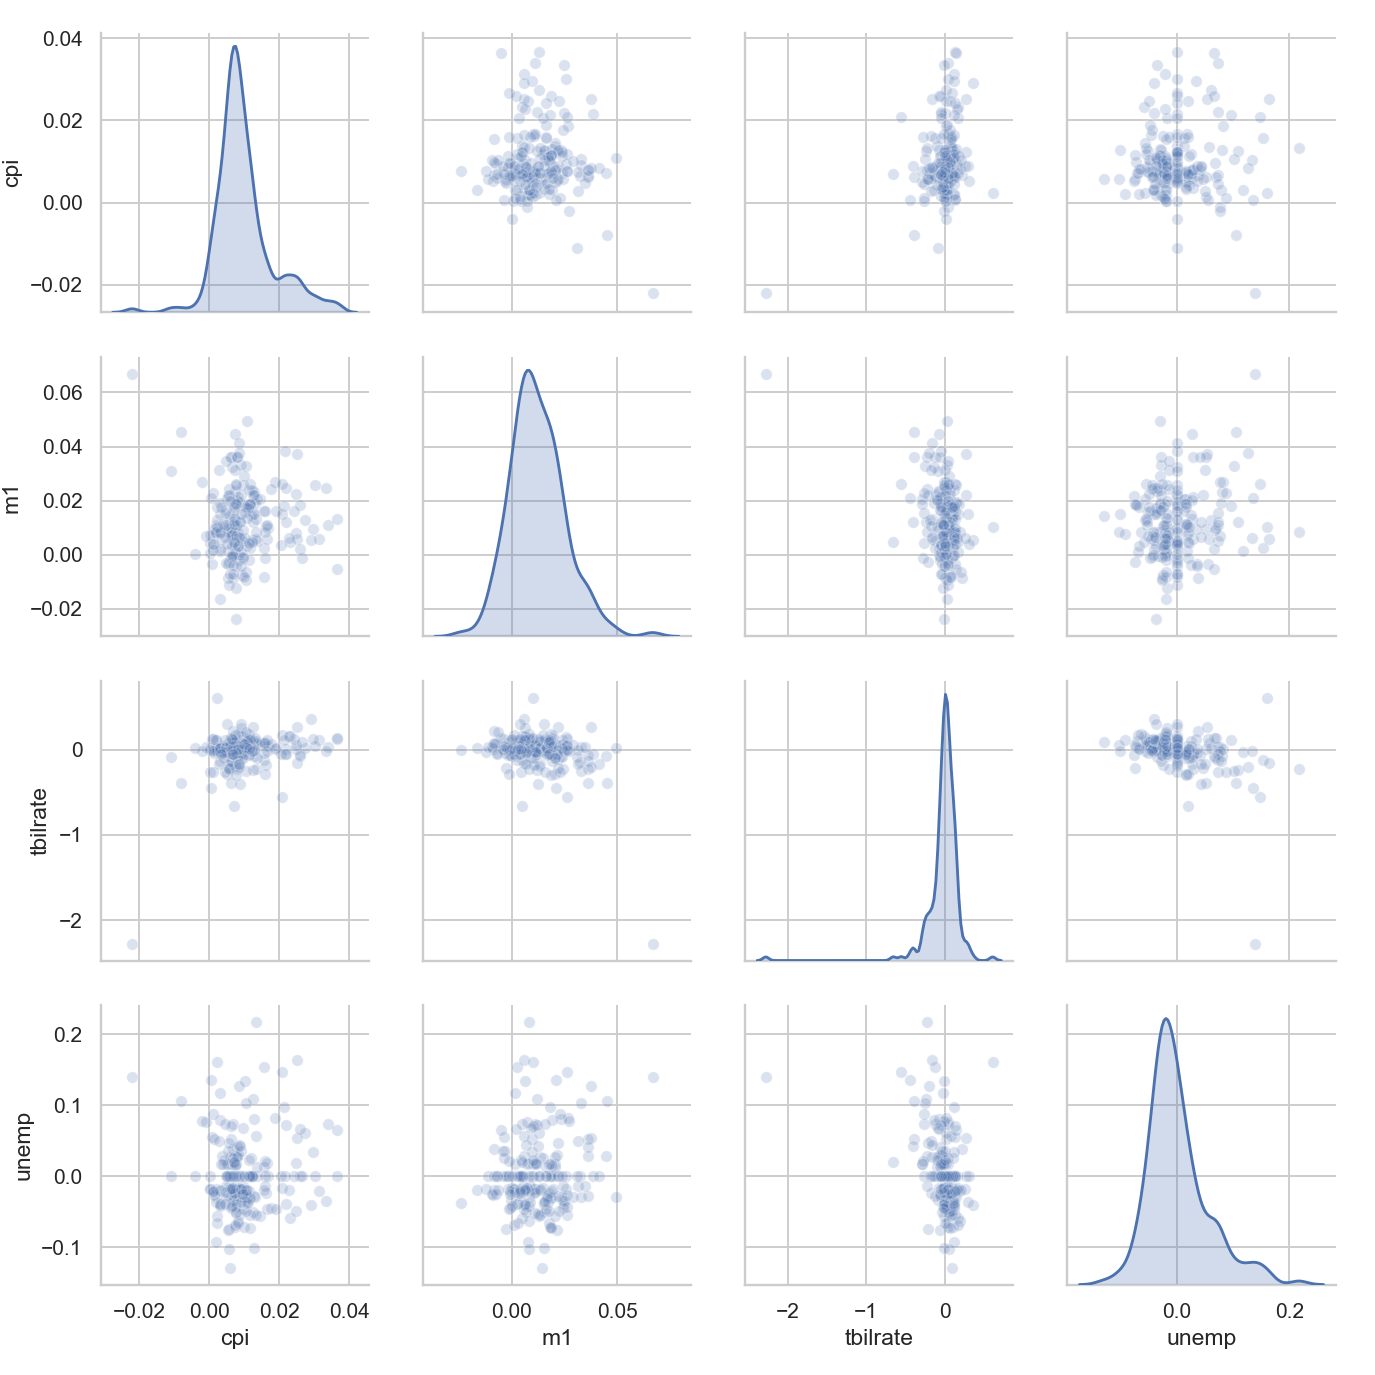

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [92]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})
# plot_kws参数，传递配置到非对角线元素上使用

#### 分面网格（facet grid）和类型数据

要是数据集有额外的分组维度呢？有多个分类变量的数据可视化的一种方法是使用小面网格。seaborn有一个有用的内置函数factorplot，简化制作多种分面图

In [96]:
tips[-7:]

,total_bill,tip,smoker,day,time,size,tip_pct
237,32.83,1.17,Yes,Sat,Dinner,2,0.036955
238,35.83,4.67,No,Sat,Dinner,3,0.149872
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899
243,18.78,3.00,No,Thur,Dinner,2,0.190114


<IPython.core.display.Javascript object>


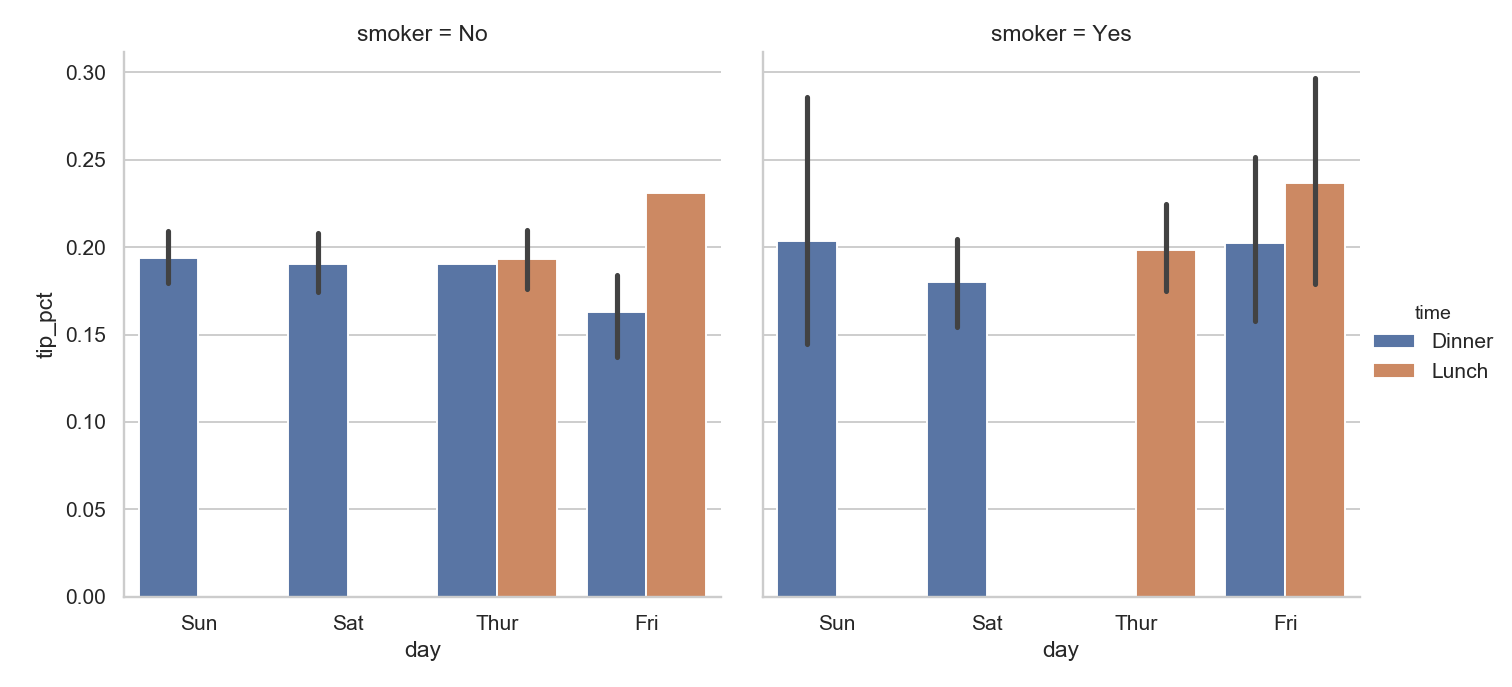

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [117]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


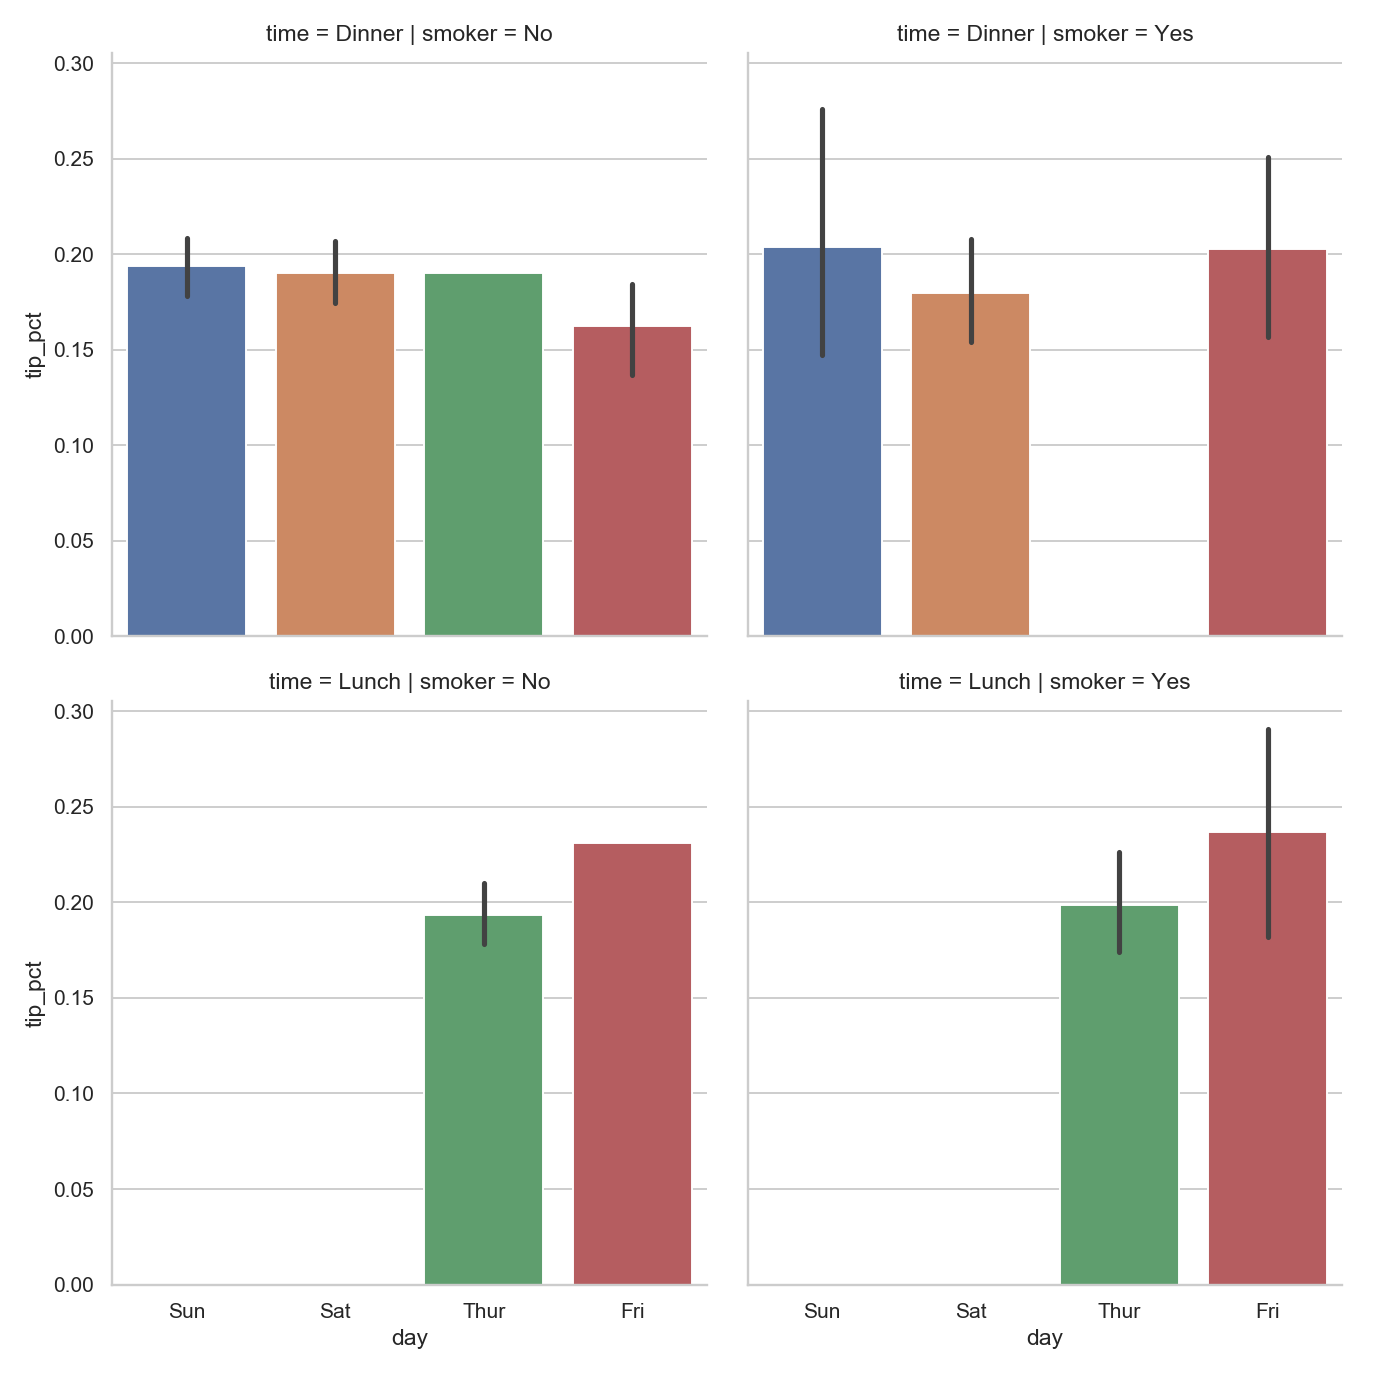

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [116]:
# 除了在分面中用不同的颜色按时间分组，可以给时间值添加一行来扩展分面网格
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

factorplot支持其他的绘图类型。例如，盒图（显示中位数、四分位数和异常值）就是一个有用的可视化类型。

<IPython.core.display.Javascript object>


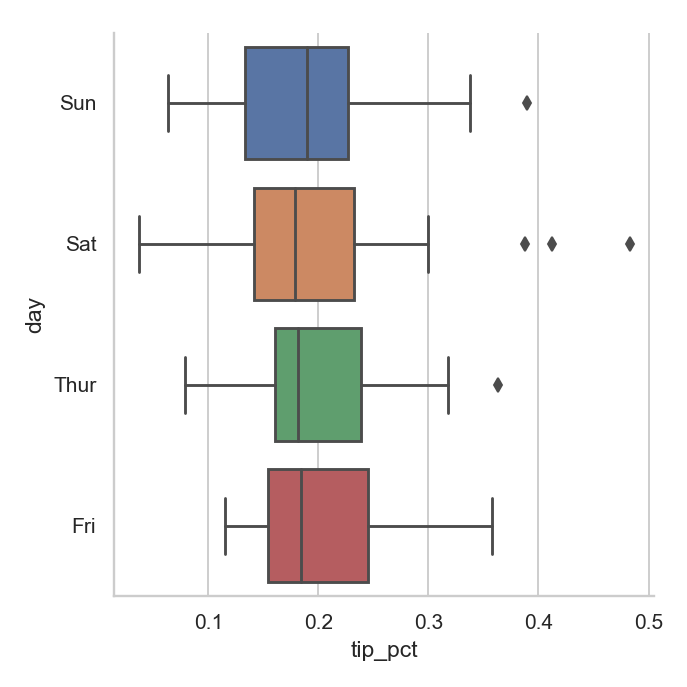

In [114]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])

### 3.其他的Python可视化工具

Boken（https://bokeh.pydata.org/en/latest/） 和Plotly（https://github.com/plotly/plotly.py） ，现在可以创建动态交互图形，用于网页浏览。